<a href="https://colab.research.google.com/github/AnnSenina/Python_DH_MNE/blob/main/notebooks/%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D1%8F%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Базовая статистика

In [ ]:
# таблички
import pandas as pd

# статистика
import numpy as np
import scipy.stats as stats
from scipy.stats.contingency import association

# графика
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Python_DH_2023/main/data/BikeDataVar.csv')
df

,Unnamed: 0,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,0,True,644,0,Chilly,0
8756,8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,0,True,359,0,Chilly,0
8757,8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,0,True,1236,0,Chilly,0
8758,8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,0,True,628,1,Chilly,0


In [ ]:
# быстрая базовая статистика
df.describe()

,Unnamed: 0,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Holiday,Rental Count,Normal Humidity,Good Weather
count,8760.000000,8760.000000,8581.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.00000,8760.000000
mean,4379.500000,11.500000,12.878557,58.226256,1.724909,0.148687,0.075068,0.049315,696.582078,0.34532,0.092694
std,2528.938512,6.922582,11.955551,20.362413,1.036300,1.128193,0.436746,0.216537,749.812613,0.47550,0.290020
min,0.000000,0.000000,-17.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2189.750000,5.750000,3.400000,42.000000,0.900000,0.000000,0.000000,0.000000,157.000000,0.00000,0.000000
50%,4379.500000,11.500000,13.700000,57.000000,1.500000,0.000000,0.000000,0.000000,425.500000,0.00000,0.000000
75%,6569.250000,17.250000,22.500000,74.000000,2.300000,0.000000,0.000000,0.000000,1009.000000,1.00000,0.000000
max,8759.000000,23.000000,39.400000,98.000000,7.400000,35.000000,8.800000,1.000000,6012.000000,1.00000,1.000000


In [ ]:
df['Temperature'].mode() # мода - наиболее часто встречающееся значение

0    23.4
Name: Temperature, dtype: float64

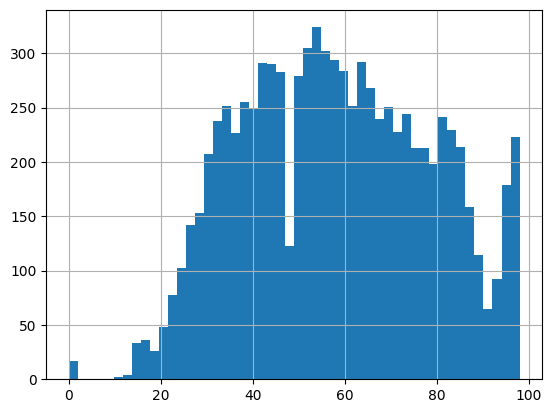

In [ ]:
# диаграмма, построенная с помощью pandas
# bins - количество столбиков
df['Humidity'].hist(bins=50);

In [ ]:
# как найти выбросы:
# обычно в исследованиях договариваются, что считать выбросами
# стандартный путь - вычислить межквартильный размах (3 квартиль - 1 квартиль)
# затем от этих квартилей заложить расстояние в 1.5 межквартильных размаха
d = df.describe()['Rental Count']['75%'] - df.describe()['Rental Count']['25%'] # межквартильный размах

print(len(df[df['Rental Count'] > df.describe()['Rental Count']['75%'] + 1.5 * d]), 'выбросов справа')
print(len(df[df['Rental Count'] < df.describe()['Rental Count']['25%'] - 1.5 * d]), 'выбросов слева')

413 выбросов справа
0 выбросов слева


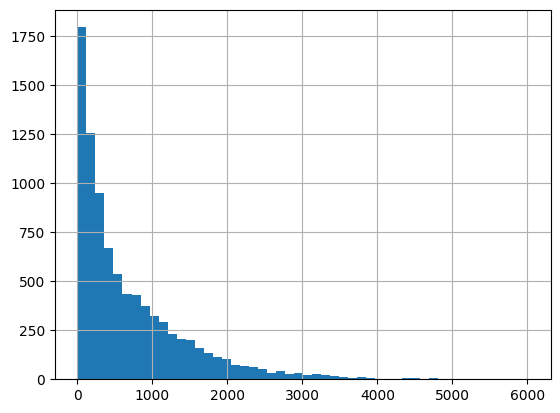

In [ ]:
df['Rental Count'].hist(bins=50);

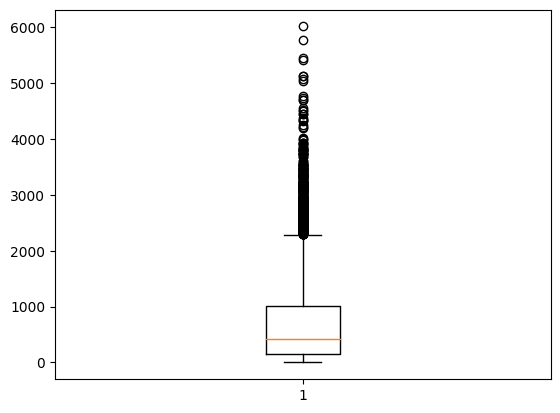

In [ ]:
plt.boxplot(df['Rental Count']);

In [ ]:
d = df.describe()['Humidity']['75%'] - df.describe()['Humidity']['25%'] # межквартильный размах

print(len(df[df['Humidity'] > df.describe()['Humidity']['75%'] + 1.5 * d]), 'выбросов справа')
print(len(df[df['Humidity'] < df.describe()['Humidity']['25%'] - 1.5 * d]), 'выбросов слева')

0 выбросов справа
0 выбросов слева


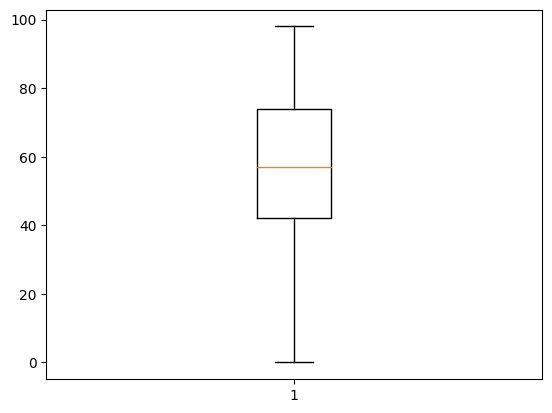

In [ ]:
plt.boxplot(df['Humidity']);

In [ ]:
# данные в pandas можно группировать
df.groupby('Temperature Category')['Temperature'].median()

Temperature Category
Chilly       7.35
Freezing    -4.90
Hot         29.10
Nice        20.60
Name: Temperature, dtype: float64

In [ ]:
df.groupby('Temperature Category')['Temperature'].mean()

Temperature Category
Chilly       7.389107
Freezing    -5.596955
Hot         29.884441
Nice        20.589165
Name: Temperature, dtype: float64

In [ ]:
df.groupby('Temperature Category')['Temperature'].mode()

AttributeError: ignored

### сложности с модой...

Для сгруппированных данных нельзя напрямую посчитать моду

Но! Есть специальный метод .agg в pandas (агрегирование данных), который позволяет посчитать все, что угодно :)

Документация [здесь](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)

А вот здесь есть еще одна [тетрадка с примерами](https://dfedorov.spb.ru/pandas/%D0%9E%D0%B1%D1%8A%D1%8F%D1%81%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9%20Grouper%20%D0%B8%20Agg%20%D0%B2%20Pandas.html)

In [ ]:
df.groupby('Temperature Category')['Temperature'].agg(pd.Series.mode)

Temperature Category
Chilly               7.6
Freezing            -1.8
Hot         [27.8, 28.2]
Nice                23.4
Name: Temperature, dtype: object

In [ ]:
df.groupby('Seasons')['Temperature Category'].agg(pd.Series.mode)
# даже моду к категориальным данным, сгруппированным по другой категориальной переменной :)

Seasons
Autumn      Chilly
Spring      Chilly
Summer         Hot
Winter    Freezing
Name: Temperature Category, dtype: object

# Корреляционный анализ

Поиск зависимостей

In [ ]:
df.corr() # метод, встроенный в pandas
# работает для всех числовых значений датафрейма

,Unnamed: 0,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Holiday,Functioning Day,Rental Count,Normal Humidity,Good Weather
Unnamed: 0,1.000000,2.737347e-03,0.579938,0.169402,-0.161288,0.038022,-0.137047,-6.604797e-02,-0.183770,0.288551,-0.001431,0.131626
Hour,0.002737,1.000000e+00,0.123090,-0.241644,0.285197,0.008715,-0.021516,-1.391486e-16,0.005439,0.345622,0.107503,0.073698
Temperature,0.579938,1.230898e-01,1.000000,0.161933,-0.037797,0.050167,-0.220160,-5.507144e-02,-0.049820,0.455155,0.022692,0.209042
Humidity,0.169402,-2.416438e-01,0.161933,1.000000,-0.336683,0.236397,0.108183,-5.027765e-02,-0.020800,-0.169085,-0.285947,-0.115874
Wind speed,-0.161288,2.851967e-01,-0.037797,-0.336683,1.000000,-0.019674,-0.003554,2.301677e-02,0.005037,0.097583,0.074964,0.032127
Rainfall,0.038022,8.714642e-03,0.050167,0.236397,-0.019674,1.000000,0.008500,-1.426911e-02,0.002055,-0.103519,-0.095339,-0.042127
Snowfall,-0.137047,-2.151645e-02,-0.220160,0.108183,-0.003554,0.008500,1.000000,-1.259072e-02,0.032089,-0.120869,-0.067939,-0.054942
Holiday,-0.066048,-1.391486e-16,-0.055071,-0.050278,0.023017,-0.014269,-0.012591,1.000000e+00,-0.027624,-0.068822,-0.020156,0.029008
Functioning Day,-0.183770,5.439377e-03,-0.049820,-0.020800,0.005037,0.002055,0.032089,-2.762445e-02,1.000000,0.173437,0.002488,-0.101806
Rental Count,0.288551,3.456218e-01,0.455155,-0.169085,0.097583,-0.103519,-0.120869,-6.882160e-02,0.173437,1.000000,0.128521,0.194224


In [ ]:
# обычно фильтруют

df[['Temperature',	'Humidity',	'Wind speed',	'Rainfall',	'Snowfall']].corr()

,Temperature,Humidity,Wind speed,Rainfall,Snowfall
Temperature,1.000000,0.161933,-0.037797,0.050167,-0.220160
Humidity,0.161933,1.000000,-0.336683,0.236397,0.108183
Wind speed,-0.037797,-0.336683,1.000000,-0.019674,-0.003554
Rainfall,0.050167,0.236397,-0.019674,1.000000,0.008500
Snowfall,-0.220160,0.108183,-0.003554,0.008500,1.000000


In [ ]:
df[['Temperature',	'Humidity',	'Wind speed',	'Rainfall',	'Snowfall']].corr().max()

Temperature    1.0
Humidity       1.0
Wind speed     1.0
Rainfall       1.0
Snowfall       1.0
dtype: float64

In [ ]:
data = df[['Temperature',	'Humidity',	'Wind speed',	'Rainfall',	'Snowfall']].corr()
data['Temperature'].sort_values()

Snowfall      -0.220160
Wind speed    -0.037797
Rainfall       0.050167
Humidity       0.161933
Temperature    1.000000
Name: Temperature, dtype: float64

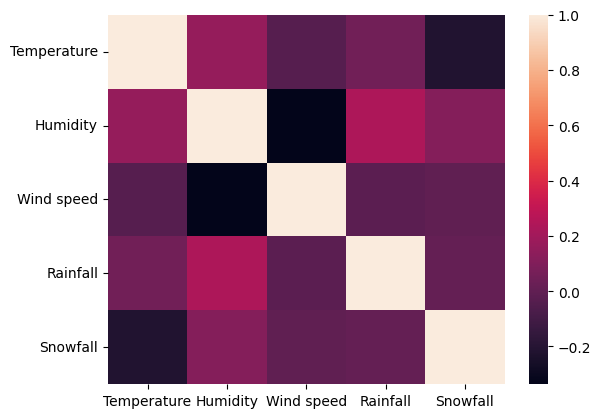

In [ ]:
# очень распространенная визуализация - тепловая карта
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(df[['Temperature',	'Humidity',	'Wind speed',	'Rainfall',	'Snowfall']].corr());

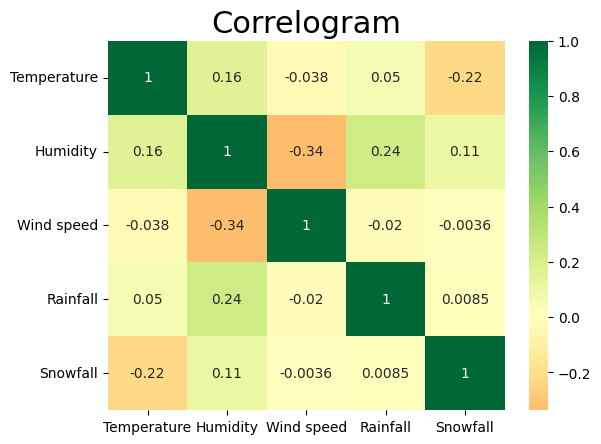

In [ ]:
# давайте ее еще немного настроим
sns.heatmap(df[['Temperature',	'Humidity',	'Wind speed',	'Rainfall',	'Snowfall']].corr(), cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram', fontsize=22);


### таблицы сопряженности

Для работы с категориальными данными придется поступать по-другому

In [ ]:
df[['Seasons', 'Temperature Category']].corr() # нельзя! данные - категориальные

""


In [ ]:
df_cat = pd.crosstab(df['Seasons'], df['Temperature Category']) # пока без промежуточных и итоговых сумм
df_cat

Temperature Category,Chilly,Freezing,Hot,Nice
Seasons,,,,
Autumn,1138,20,86,894
Spring,1224,22,27,881
Summer,0,0,1166,1003
Winter,750,1370,0,0


In [ ]:
stats.chi2_contingency(df_cat)

Chi2ContingencyResult(statistic=9052.81043676272, pvalue=0.0, dof=9, expected_freq=array([[775.37070272, 351.8070155 , 318.66938585, 692.15289593],
       [781.17328983, 354.43980888, 321.05418949, 697.33271181],
       [786.61321524, 356.90805267, 323.2899429 , 702.18878919],
       [768.84279222, 348.84512295, 315.98648176, 686.32560308]]))

### Что это и как читать результат?

Категориальные данные представлять числами некорректно - но для них можно составить частотную таблицу.

Далее будем проверять критерий хи-квадрат независимости Пирсона (внимание! критериев хи-квадрат - несколько, а основанных на них метрик - еще больше (точный тест Фишера, коэффициент корреляции Крамера и др.)

Когда работаем с критерием хи-квадрат независимости, общая идея такая:

* нулевая гипотеза: переменные независимы друг от друга

* альтернативная гипотеза: между переменными есть связь

* если pvalue <= 0.05, значит, нулевая гипотеза отвергается, переменные связаны

* если pvalue > 0.05, отвегрнуть нулевую гипотезу нельзя, переменные независимы друг от друга

In [ ]:
def vcramer(table):
    chi, p, _, _ = stats.chi2_contingency(table,correction=False)
    n = table.sum()
    r,c = table.shape
    return np.sqrt(chi/(n*(min(r,c)-1.))), p

vcramer(df_cat.values)
# Крамер - коэффициент корреляции для категориальных данных
# Правда идеальный вариант - когда его считают к таблице 2 на 2, так результат точнее

(0.5930101609869638, 0.0)